Analyze indian crop production data (collected from 1997 to 2022) and get production and area statistics and understand more on the Indian Agriculture history for crop production.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
df= pd.read_csv("/content/India Agriculture Crop Production.csv")
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


yields are the harvested production per unit of harvested area for crop products

In [ ]:
df.tail()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
80881,Uttar Pradesh,BUDAUN,Rice,2004-05,Kharif,90405.0,Hectare,142174.0,Tonnes,1.572634
80882,Uttar Pradesh,BUDAUN,Rice,2005-06,Kharif,67430.0,Hectare,118407.0,Tonnes,1.755999
80883,Uttar Pradesh,BUDAUN,Rice,2006-07,Kharif,87564.0,Hectare,161030.0,Tonnes,1.838998
80884,Uttar Pradesh,BUDAUN,Rice,2006-07,Summer,73.0,Hectare,134.0,Tonnes,1.835616
80885,Uttar Pradesh,BULANDSHAHR,Rice,2004-05,Kharif,50510.0,Hectare,122273.0,Tonnes,NaN


In [ ]:
df.shape

(80886, 10)

In [ ]:
df.describe()

,Area,Production,Yield
count,8.088600e+04,7.965900e+04,80885.000000
mean,1.143334e+04,9.736941e+05,72.681127
std,3.722140e+04,2.079811e+07,838.697327
min,2.000000e-01,0.000000e+00,0.000000
25%,9.200000e+01,1.000000e+02,0.490247
50%,6.420000e+02,7.310000e+02,0.934747
75%,4.602750e+03,6.800000e+03,2.008126
max,1.020181e+06,1.482900e+09,28334.155972


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80886 entries, 0 to 80885
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             80886 non-null  object 
 1   District          80886 non-null  object 
 2   Crop              80886 non-null  object 
 3   Year              80886 non-null  object 
 4   Season            80886 non-null  object 
 5   Area              80886 non-null  float64
 6   Area Units        80886 non-null  object 
 7   Production        79659 non-null  float64
 8   Production Units  80886 non-null  object 
 9   Yield             80885 non-null  float64
dtypes: float64(3), object(7)
memory usage: 6.2+ MB


In [ ]:
df.isnull().any()

State               False
District            False
Crop                False
Year                False
Season              False
Area                False
Area Units          False
Production           True
Production Units    False
Yield                True
dtype: bool

In [ ]:
df.isnull().sum()

State                  0
District               0
Crop                   0
Year                   0
Season                 0
Area                   0
Area Units             0
Production          1227
Production Units       0
Yield                  1
dtype: int64

# Data Clearing

In [ ]:
#Replace NULL values with the number between the previous and next row

df1=df.interpolate()

In [ ]:
# Fill Nan vallues of a specific row and column

df1.at[57837,'Area Units']='Hectare'
df1.at[57837,'Production Units']='Tonnes'
df1.tail()

# Or It can be done by simplily -
# df1=df1.fillna(method="ffill")
# It will copy the previous row data of coloumn to the below next row of that column

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
80881,Uttar Pradesh,BUDAUN,Rice,2004-05,Kharif,90405.0,Hectare,142174.0,Tonnes,1.572634
80882,Uttar Pradesh,BUDAUN,Rice,2005-06,Kharif,67430.0,Hectare,118407.0,Tonnes,1.755999
80883,Uttar Pradesh,BUDAUN,Rice,2006-07,Kharif,87564.0,Hectare,161030.0,Tonnes,1.838998
80884,Uttar Pradesh,BUDAUN,Rice,2006-07,Summer,73.0,Hectare,134.0,Tonnes,1.835616
80885,Uttar Pradesh,BULANDSHAHR,Rice,2004-05,Kharif,50510.0,Hectare,122273.0,Tonnes,1.835616


In [ ]:
df1.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

# Unique count and values for Crops, states and districts

In [ ]:
unique_crop= df1["Crop"].unique()
print(" Total no of unique crops: " , len(unique_crop))
print ("\n The unique crops are- ", unique_crop)

 Total no of unique crops:  54

 The unique crops are-  ['Arecanut' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut' 'Dry chillies'
 'Ginger' 'Other Kharif pulses' 'other oilseeds' 'Rice' 'Sugarcane'
 'Sweet potato' 'Arhar/Tur' 'Bajra' 'Castor seed' 'Coriander'
 'Cotton(lint)' 'Gram' 'Groundnut' 'Horse-gram' 'Jowar' 'Linseed' 'Maize'
 'Mesta' 'Moong(Green Gram)' 'Niger seed' 'Onion' 'Other Rabi pulses'
 'Potato' 'Ragi' 'Rapeseed &Mustard' 'Safflower' 'Sesamum' 'Small millets'
 'Soyabean' 'Sunflower' 'Tapioca' 'Tobacco' 'Turmeric' 'Urad' 'Wheat'
 'Oilseeds total' 'Jute' 'Masoor' 'Peas & beans (Pulses)' 'Barley'
 'Garlic' 'Khesari' 'Sannhamp' 'Guar seed' 'Moth' 'Cardamom'
 'Other Cereals' 'Cowpea(Lobia)']


In [ ]:
unique_states= df1["State"].unique()
print (" Total no of states are- ", len(unique_states))
print ("\n The states in the record are- ",unique_states)

 Total no of states are-  34

 The states in the record are-  ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [ ]:
unique_districts= df1["District"].unique()
print(" Total no of districts - ", len(unique_districts))

 Total no of districts -  598


In [ ]:
unique_units= list(df1["Production Units"].unique())
print(unique_units)

['Tonnes', 'Nuts', 'Bales']


**Unit conversion in tonnes:**

1 tonne=4.96 bale. Nuts is a unit for Coconut and 1 Coconut = 1 Nut unit. As per this resource an average coconut weights 1.5 to 2 KG. Let us assume that one coconut weights 2 KG, we will have 50 coconuts in 1 Ton (100 KG). So, 1 Tonne= 50 nuts

In [ ]:
def unit_conversion (df1):
  if df1["Production Units"]=="Nuts":
    new_production= df1["Production"]/50
    return new_production

  elif df1["Production Units"] == "Tonnes":
        return df1["Production"]
    
  else:
        new_production = df1["Production"] / 4.59
        return new_production

df1["New Production"] =df1.apply(unit_conversion, axis = 1)
df1.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,New Production
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,2061.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,2083.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1525.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000,5239.0
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296,5267.0


Now, we can drop production and production unit columns as these have no use now.

In [ ]:
df1.drop(columns = ["Production", "Production Units"], inplace = True)


# Some questions

**1) Which crop is the most common choice for agriculture in India ?**

In [ ]:
df1["Crop"].value_counts().head()
# head() prints the first some columns

Rice                 21175
Maize                20003
Moong(Green Gram)    14722
Urad                 14241
Sesamum              12788
Name: Crop, dtype: int64

So, Rice is the most common , then maize, moong and so on.

**2) Get statewise total production**

In [ ]:
production_list=[]
for State in unique_states:
  total_crop= df1.loc[df1["State"]==State, "New Production"].sum()
  production_list.append(total_crop)

crop_production_df= pd.DataFrame({ "State": unique_states,
                              "Total Crop Production": production_list})


In [ ]:
crop_production_df

,State,Total Crop Production
0,Andaman and Nicobar Islands,1.099294e+07
1,Andhra Pradesh,3.582658e+08
2,Arunachal Pradesh,2.054488e+06
3,Assam,5.316507e+07
4,Bihar,9.646485e+07
5,Chandigarh,2.740100e+04
6,Chhattisgarh,3.532418e+07
7,Dadra and Nagar Haveli,9.193630e+05
8,Daman and Diu,1.578400e+04
9,Delhi,6.815264e+05


In [ ]:
crop_production_df.sort_values("Total Crop Production",ascending=False).head()

,State,Total Crop Production
31,Uttar Pradesh,4.182656e+09
17,Kerala,2.944767e+09
29,Tamil Nadu,2.631380e+09
16,Karnataka,2.316789e+09
19,Maharashtra,1.702277e+09


So, Uttar Pradesh is the highest crop producer state.

**3) Which state is the highest producer of Rice for total production?**

In [ ]:
rice_df= df1[df1["Crop"]=="Rice"]
rice_df


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,New Production
41,Andaman and Nicobar Islands,NICOBARS,Rice,2001-02,Kharif,83.0,Hectare,300.00,Tonnes,3.614458,300.00
42,Andaman and Nicobar Islands,NICOBARS,Rice,2002-03,Kharif,189.2,Hectare,510.84,Tonnes,2.700000,510.84
43,Andaman and Nicobar Islands,NICOBARS,Rice,2003-04,Kharif,52.0,Hectare,90.17,Tonnes,1.734038,90.17
44,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Rice,2001-02,Kharif,9718.0,Hectare,27033.00,Tonnes,2.781745,27033.00
45,Andaman and Nicobar Islands,SOUTH ANDAMANS,Rice,2002-03,Kharif,10695.8,Hectare,31600.82,Tonnes,2.954507,31600.82
...,...,...,...,...,...,...,...,...,...,...,...
80881,Uttar Pradesh,BUDAUN,Rice,2004-05,Kharif,90405.0,Hectare,142174.00,Tonnes,1.572634,142174.00
80882,Uttar Pradesh,BUDAUN,Rice,2005-06,Kharif,67430.0,Hectare,118407.00,Tonnes,1.755999,118407.00
80883,Uttar Pradesh,BUDAUN,Rice,2006-07,Kharif,87564.0,Hectare,161030.00,Tonnes,1.838998,161030.00
80884,Uttar Pradesh,BUDAUN,Rice,2006-07,Summer,73.0,Hectare,134.00,Tonnes,1.835616,134.00


In [ ]:
unique_rice_growing_states = list(df1["State"].unique())

total_rice_production = []
for state in unique_rice_growing_states:
    total_rice_crop =rice_df.loc[rice_df["State"] == state, "New Production"].sum()
    total_rice_production.append(total_rice_crop)
    

#Create a dataframe with required information
rice_crop_production_df = pd.DataFrame({"State" : unique_rice_growing_states, 
             "Total Rice Production" : total_rice_production})

#List the top 5 rice producing states 
rice_crop_production_df.sort_values("Total Rice Production", ascending = False).head()

,State,Total Rice Production
1,Andhra Pradesh,60846178.0
26,Punjab,58120000.0
31,Uttar Pradesh,44100676.0
33,West Bengal,42867025.0
24,Odisha,37516000.0


**4) Best Year for Agriculture**

In [ ]:
unique_year_list = list(df1["Year"].unique())
print(unique_year_list)

[' 2001-02', ' 2002-03', ' 2003-04', ' 2004-05', ' 2005-06', ' 2006-07']


In [ ]:
yearly_production_list = []
for year in unique_year_list:
    total_yearly_production = df1.loc[df1["Year"] == year, "New Production"].sum()
    yearly_production_list.append(total_yearly_production)
    

yearly_production_df = pd.DataFrame({"year" : unique_year_list, 
                                   "total crop production" : yearly_production_list})


yearly_production_df.sort_values("total crop production", ascending = False).head()

,year,total crop production
2,2003-04,7.715876e+08
1,2002-03,7.607873e+08
0,2001-02,7.441989e+08
5,2006-07,7.329261e+08
4,2005-06,6.713331e+08


In [ ]:
yearly_production_df.sort_values("total crop production", ascending = True).head()

,year,total crop production
3,2004-05,5.815448e+08
4,2005-06,6.713331e+08
5,2006-07,7.329261e+08
0,2001-02,7.441989e+08
1,2002-03,7.607873e+08


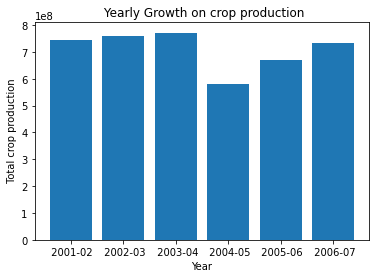

In [ ]:
plt.bar(yearly_production_df["year"],yearly_production_df["total crop production"])
plt.title(" Yearly Growth on crop production")
plt.xlabel("Year")
plt.ylabel(" Total crop production")
plt.show()


From the above, we can see that 1997-98 was the year with least production.